156639763
fwd: 42.17779411903381
bwd: 222.2461534650581
fwd: 42.17779411903381
bwd: 222.2461534650581
perp fwd: 312.3088514201244
perp bwd: 132.19590076343005


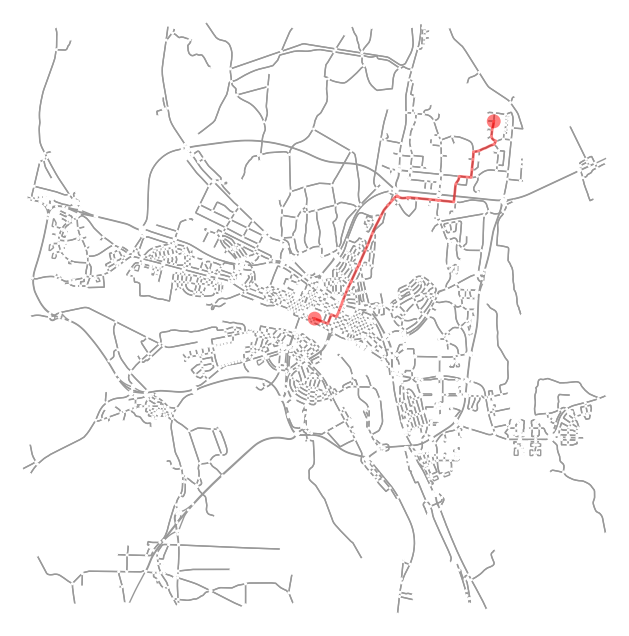

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[17508.51177647 21456.70104968 20417.84075144 11167.50675179
 11584.62679185  9729.34607258  4741.13222331  7975.24919565
  8326.87434118 11842.14060787 22670.829866   16228.65573096
  6302.91863933  9934.23947422  7660.1429041   4302.04608316
  7312.99238712 14424.34146491 17508.51177647 21456.70104968
 20417.84075144 11167.50675179 11584.62679185  9729.34607258
  4741.13222331  7975.24919565  8326.87434118 11842.14060787
 22670.829866   16228.65573096  6302.91863933  9934.23947422
  7660.1429041   4302.04608316  7312.99238713 14424.34146491]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Normalized: 

[0.04098701 0.05022963 0.04779768 0.02614287 0.02711934 0.02277617
 0.01109888 0.01866987 0.01949302 0.02772217 0.05307188 0.0379909
 0.01475498 0.02325582 0.01793221 0.01007099 0.01711954 0.03376704
 0.04098701 

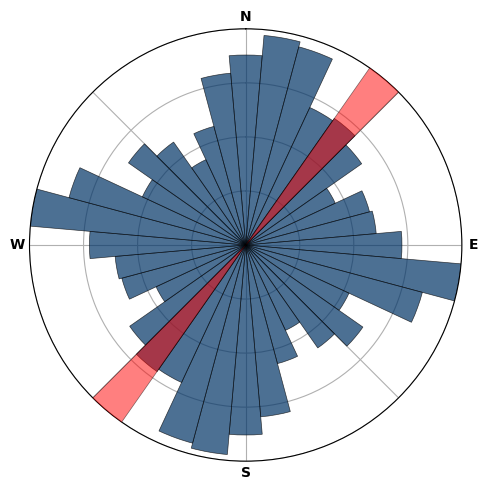

In [12]:
import os
import osmnx as ox
from network_route_analysis.origin_graph import origin_graph
from network_route_analysis.od_pair import od_pair
import numpy as np

ume = (63.825603, 20.262998)
home = (63.862483, 20.336844)

if os.path.exists("bug_testing/ume_graph.graphml"):
    ume_graph = origin_graph.from_graphml("bug_testing/ume_graph.graphml")
else:
    ume_graph = origin_graph(origin_point=ume, distance_from_point=6000, network_type="drive", simplify=True,
                             remove_parallel=True, city_name="Ume")
    ume_graph.add_simplest_paths_from_origin()
    ume_graph.add_weights('deviation_from_prototypical')
    ume_graph.add_weights('node_degree')
    ume_graph.add_weights('instruction_equivalent')
    ume_graph.add_weights('betweenness_centrality')
    ume_graph.save_graph("bug_testing/ume_graph.graphml")
    ox.plot_graph(ume_graph.graph, node_color='#8b0000', node_size=5, edge_linewidth=1, edge_color='black',
                  bgcolor='white',
                  save=True, filepath="bug_testing/ume.png", show=False)

home_node = ox.nearest_nodes(ume_graph.graph, home[1], home[0])
print(home_node)
od_p = od_pair(ume_graph.graph, origin=ume_graph.start_node, destination=home_node)

# Find the shortest route and plot it
shortest_route = ox.shortest_path(ume_graph.graph, ume_graph.start_node, home_node, weight='length')
ox.plot_graph_route(ume_graph.graph, shortest_route, node_size=5, bgcolor='white', route_color='red', route_linewidth=2)

od_p.create_orientation_plot("bug_testing/NY_od_pair.png")
od_p_env_dist = od_p.env_bearing_dist_weighted
od_p_route_dist = od_p.route_direction_bearing_dist
print(od_p_env_dist)
print(od_p_route_dist)
print("\n Normalized: \n")
env = od_p_env_dist / np.sum(od_p_env_dist)
route = od_p_route_dist  / np.sum(od_p_env_dist)
print(env)
print(route)



true
42430685
fwd: 291.32875611595364
bwd: 111.3087631324373
fwd: 291.32875611595364
bwd: 111.3087631324373
perp fwd: 201.18520434767993
perp bwd: 21.173540475533844


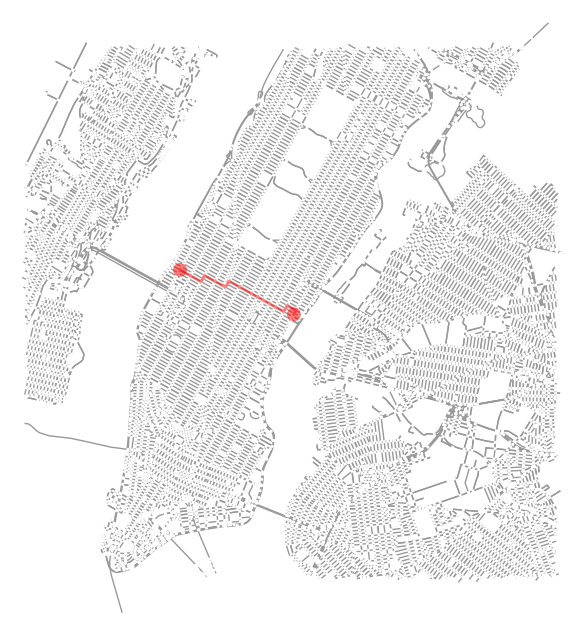

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[  946.9108391   2039.5435283   2267.96741105 49277.17027963
   762.17720188   770.21464162   867.60861547   775.40556425
   951.41154505   701.79834491   439.7589058  12273.6180906
 96844.08718989  1354.24780004   201.6790384    265.91738321
   182.82988317   247.38022188   946.9108391   2039.5435283
  2267.96741105 49277.17027963   762.17720188   770.21464162
   867.60861547   775.40556425   951.41154505   701.79834491
   439.7589058  12273.6180906  96844.08718989  1354.24780004
   201.6790384    265.91738321   182.82988317   247.38022188]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

 Normalized: 

[0.002766   0.00595766 0.00662491 0.14394242 0.00222638 0.00224986
 0.00253435 0.00226502 0.00277915 0.00205001 0.00128457 0.03585219
 0.28288906 0.00395586 0.00058912 0.00077677 0.00053406 0.00072262
 0.002766   0

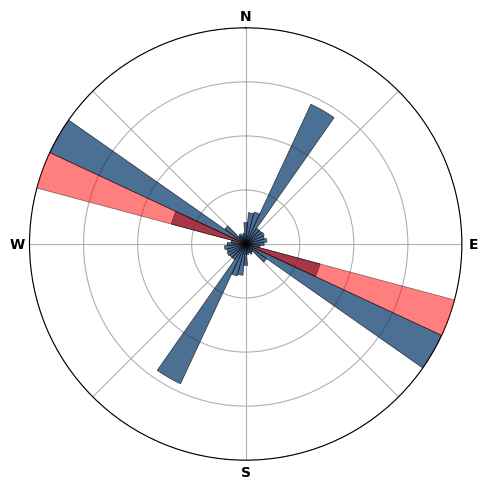

In [13]:
manhattan_aligned_A = (-73.967053,40.754002)
manhattan_aligned_B = (-73.996057,40.762327)

if os.path.exists("bug_testing/NY_graph.graphml"):
    NY_graph = origin_graph.from_graphml("bug_testing/NY_graph.graphml")
    print("true")
else:
    NY_graph = origin_graph(origin_point=(manhattan_aligned_A[1],manhattan_aligned_A[0]), distance_from_point=6000, network_type="drive", simplify=True,
                             remove_parallel=True, city_name="NY")
    NY_graph.add_simplest_paths_from_origin()
    NY_graph.add_weights('deviation_from_prototypical')
    NY_graph.add_weights('node_degree')
    NY_graph.add_weights('instruction_equivalent')
    NY_graph.add_weights('betweenness_centrality')
    NY_graph.save_graph("bug_testing/NY_graph.graphml")
    ox.plot_graph(NY_graph.graph, node_color='#8b0000', node_size=5, edge_linewidth=1, edge_color='black',
                  bgcolor='white',
                  save=True, filepath="bug_testing/NY.png", show=False)

home_node = ox.nearest_nodes(NY_graph.graph, manhattan_aligned_B[0], manhattan_aligned_B[1])
print(home_node)
od_p_NY = od_pair(NY_graph.graph, origin=NY_graph.start_node, destination=home_node)

# Find the shortest route and plot it
shortest_route = ox.shortest_path(NY_graph.graph, NY_graph.start_node, home_node, weight='length')
ox.plot_graph_route(NY_graph.graph, shortest_route, node_size=5, bgcolor='white', route_color='red', route_linewidth=2)



od_p_NY.create_orientation_plot("bug_testing/NY_od_pair.png")
od_p_NY_env_dist = od_p_NY.env_bearing_dist_weighted
od_p_NY_route_dist = od_p_NY.route_direction_bearing_dist
print(od_p_NY_env_dist)
print(od_p_NY_route_dist)
print("\n Normalized: \n")
NY_env = od_p_NY_env_dist / np.sum(od_p_NY_env_dist)
NY_route = od_p_NY_route_dist  / np.sum(od_p_NY_env_dist)
print(NY_env)
print(NY_route)

Optimal lag: -6
Maximum correlation magnitude: 0.0000

Correlation Table:


,Lag,Correlation (Real),Correlation (Imag),Correlation (Magnitude)
0,-18,1.269715e-07,3.086574e-24,1.269715e-07
1,-17,1.223997e-07,2.795599e-24,1.223997e-07
2,-16,2.237865e-07,-6.616183e-24,2.237865e-07
3,-15,2.351728e-07,-4.754133e-24,2.351728e-07
4,-14,1.918993e-07,1.072774e-23,1.918993e-07
5,-13,1.580957e-07,-2.692543e-24,1.580957e-07
6,-12,8.015289e-08,1.454871e-25,8.015289e-08
7,-11,4.715189e-08,-2.495527e-24,4.715189e-08
8,-10,8.395777e-08,6.539522e-24,8.395777e-08
9,-9,1.088826e-07,-3.425026e-25,1.088826e-07


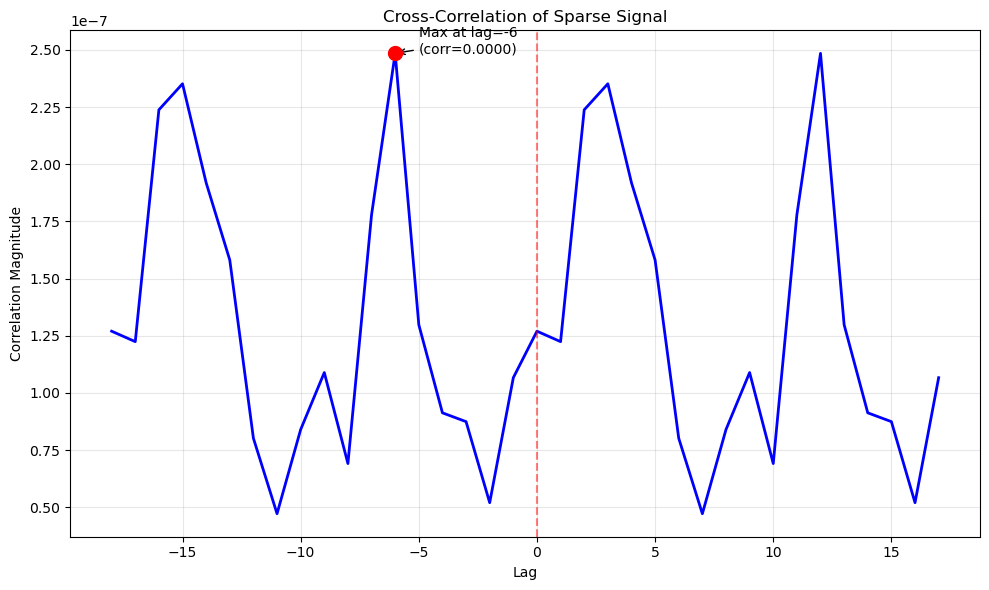

In [14]:
import pandas as pd
def cross_correlation_table(route, env, max_lags=None):
    """
    Calculates cross-correlation at different lags and returns a detailed table.

    Parameters:
    -----------
    route : array-like
        The sparse, known histogram (reference signal)
    env : array-like
        The noisy histogram to match
    max_lags : int, optional
        Maximum number of lags to display (centered around 0). If None, all lags are shown.

    Returns:
    --------
    DataFrame
        A pandas DataFrame showing the correlation strength at different lags
    """
    # Convert inputs to numpy arrays
    route = np.asarray(route)
    env = np.asarray(env)

    # Compute FFTs
    fft_route = np.fft.fft(route)
    fft_env = np.fft.fft(env)

    # Calculate complex conjugate of fft_env
    fft_env_conj = np.conj(fft_env)

    # Calculate element-wise product
    product = fft_route * fft_env_conj

    # Calculate the inverse FFT to get back to the time domain
    result = np.fft.ifft(product)

    # Roll the result to center it around zero
    n = len(result)
    centered_result = np.roll(result, -(n // 2))

    # Determine which lags to display
    if max_lags is None or max_lags >= n:
        lags = np.arange(-n//2, n//2 + n % 2)
        correlation_values = centered_result
    else:
        # Select a subset of lags centered around 0
        half_window = min(max_lags // 2, n // 2)
        start_idx = n//2 - half_window
        end_idx = n//2 + half_window + n % 2
        lags = np.arange(-half_window, half_window + n % 2)
        correlation_values = centered_result[start_idx:end_idx]

    # Create a DataFrame for the table
    data = {
        'Lag': lags,
        'Correlation (Real)': np.real(correlation_values),
        'Correlation (Imag)': np.imag(correlation_values),
        'Correlation (Magnitude)': np.abs(correlation_values)
    }

    df = pd.DataFrame(data)

    # Find the lag with maximum correlation
    max_idx = np.argmax(np.abs(correlation_values))
    optimal_lag = lags[max_idx]
    max_correlation = np.abs(correlation_values[max_idx])

    print(f"Optimal lag: {optimal_lag}")
    print(f"Maximum correlation magnitude: {max_correlation:.4f}")

    return df

def visualize_correlation(df, title="Cross-Correlation Results"):
    """
    Creates a visualization of the correlation strengths at different lags.

    Parameters:
    -----------
    df : DataFrame
        The correlation table returned by cross_correlation_table()
    title : str
        Title for the plot
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Lag'], df['Correlation (Magnitude)'], 'b-', linewidth=2)
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

    # Find and mark the maximum correlation
    max_idx = df['Correlation (Magnitude)'].idxmax()
    max_lag = df.loc[max_idx, 'Lag']
    max_corr = df.loc[max_idx, 'Correlation (Magnitude)']

    plt.scatter([max_lag], [max_corr], color='r', s=100, zorder=5)
    plt.annotate(f"Max at lag={max_lag}\n(corr={max_corr:.4f})",
                 xy=(max_lag, max_corr),
                 xytext=(max_lag + 1, max_corr),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

    plt.grid(True, alpha=0.3)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Correlation Magnitude")
    plt.tight_layout()

    return plt

correlation_df = cross_correlation_table(route, env)

# Display the table
print("\nCorrelation Table:")
display(correlation_df)

# Visualize the correlation
plt = visualize_correlation(correlation_df, title="Cross-Correlation of Sparse Signal")
plt.show()

Optimal lag: -1
Maximum correlation magnitude: 0.0000

Correlation Table:


,Lag,Correlation (Real),Correlation (Imag),Correlation (Magnitude)
0,-18,2.094540e-07,3.929533e-23,2.094540e-07
1,-17,7.504655e-09,4.583333e-23,7.504655e-09
2,-16,1.197646e-08,7.154170e-23,1.197646e-08
3,-15,1.623620e-08,8.599777e-23,1.623620e-08
4,-14,1.323259e-08,2.978864e-23,1.323259e-08
5,-13,1.480608e-08,-4.097703e-23,1.480608e-08
6,-12,1.314401e-08,-1.899850e-23,1.314401e-08
7,-11,1.300685e-08,-2.763656e-23,1.300685e-08
8,-10,8.409339e-07,-1.124798e-22,8.409339e-07
9,-9,3.870374e-08,-5.431750e-23,3.870374e-08


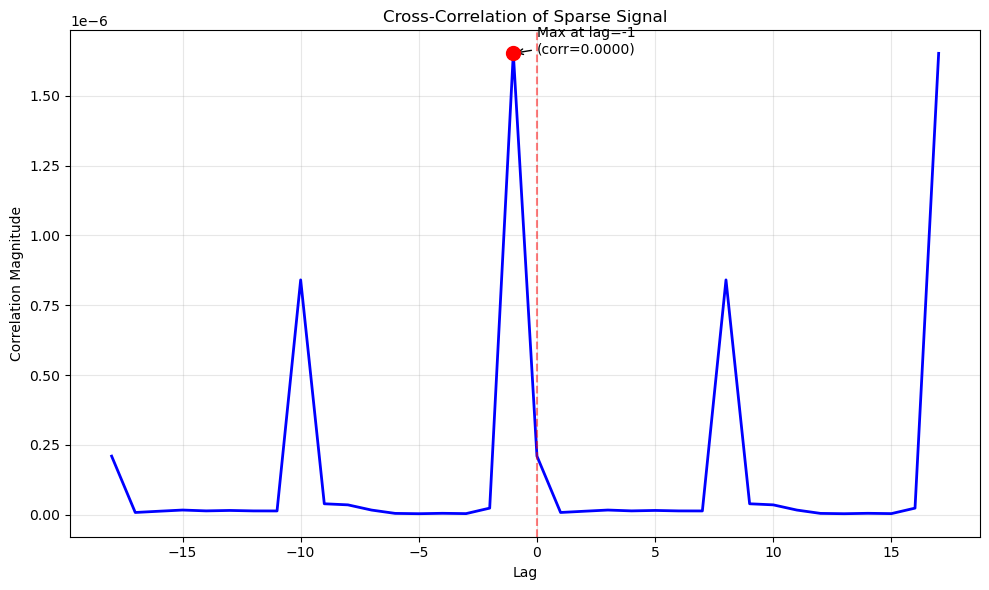

In [15]:
correlation_df = cross_correlation_table(NY_route, NY_env)

# Display the table
print("\nCorrelation Table:")
display(correlation_df)

# Visualize the correlation
plt = visualize_correlation(correlation_df, title="Cross-Correlation of Sparse Signal")
plt.show()

Histogram min: 0.010070988143611112, max: 0.053071876584496996, sum: 0.9999999999999997
FFT of route
[ 4.68195270e-06+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  8.13012555e-07-4.61082332e-06j  0.00000000e+00+0.00000000e+00j
 -4.39959641e-06-1.60132213e-06j  0.00000000e+00+0.00000000e+00j
 -2.34097635e-06+4.05468998e-06j  0.00000000e+00+0.00000000e+00j
  3.58658385e-06+3.00950119e-06j  0.00000000e+00+0.00000000e+00j
  3.58658385e-06-3.00950119e-06j  0.00000000e+00+0.00000000e+00j
 -2.34097635e-06-4.05468998e-06j  0.00000000e+00+0.00000000e+00j
 -4.39959641e-06+1.60132213e-06j  0.00000000e+00+0.00000000e+00j
  8.13012555e-07+4.61082332e-06j  0.00000000e+00+0.00000000e+00j
  4.68195270e-06+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  8.13012555e-07-4.61082332e-06j  0.00000000e+00+0.00000000e+00j
 -4.39959641e-06-1.60132213e-06j  0.00000000e+00+0.00000000e+00j
 -2.34097635e-06+4.05468998e-06j  0.00000000e+00+0.00000000e+00j
  3.58658385e-06+3.00950119e-06j  0.00000000e+00+0.000

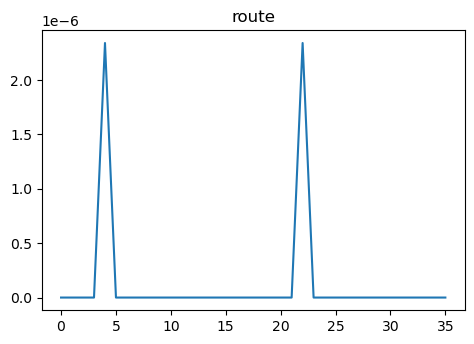

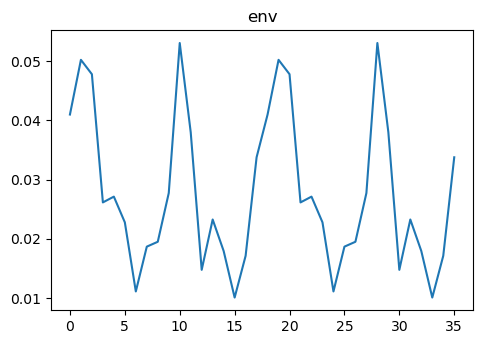

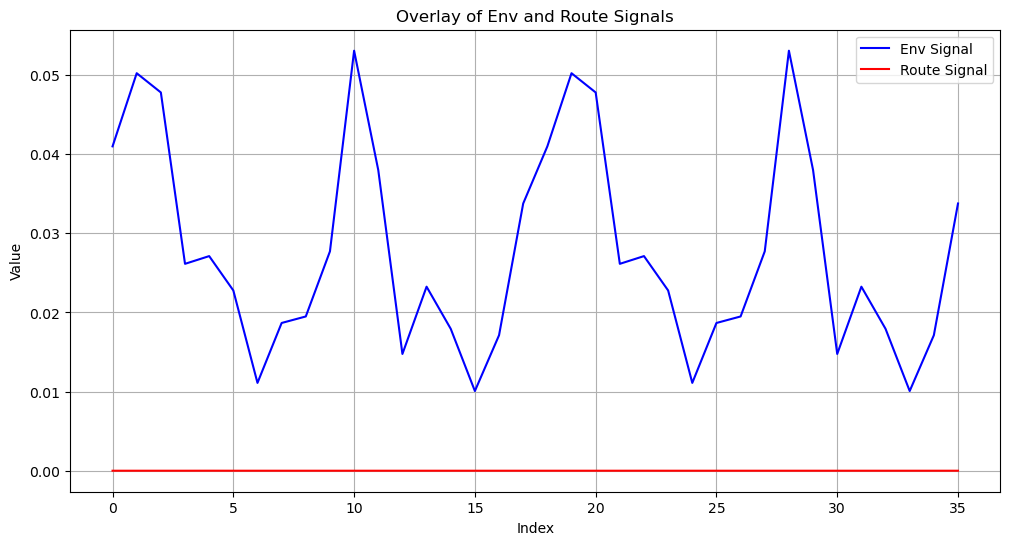

In [16]:
"""Calculates the circular cross-correlation using FFT."""

# Transforming the route and bearing distribution to arrays
route = np.asarray(route)
env = np.asarray(env)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(np.abs(route))
plt.title('route')

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(np.abs(env))
plt.title('env')

print(f"Histogram min: {np.min(env)}, max: {np.max(env)}, sum: {np.sum(env)}")
# Transforming the route and bearing distributions to discrete signal
fft_route = np.fft.fft(route)
fft_env = np.fft.fft(env)
print("FFT of route")
print(fft_route)

print("FFT of env")
print(fft_env)

# Overlay plot for route and env signals
plt.figure(figsize=(12, 6))
plt.plot(np.abs(env), label='Env Signal', color='blue')
plt.plot(np.abs(route), label='Route Signal', color='red')
plt.title('Overlay of Env and Route Signals')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()






Calculating complex conjugate of fft_b


array([ 1.00000000e+00-0.00000000e+00j, -4.37204897e-16-1.33054693e-15j,
        7.06835162e-02+4.15473289e-02j, -4.75779050e-16-1.54527807e-15j,
        1.86259414e-01+2.03593523e-01j,  1.07734745e-15-1.02392013e-15j,
        9.96545285e-03-2.50569485e-02j,  3.11018385e-16-1.78934234e-15j,
        4.07800994e-02+8.61666184e-02j, -2.19615992e-15+2.09901541e-16j,
        1.59002831e-02-5.17918411e-02j,  1.86729283e-16+1.25522902e-16j,
       -1.07669293e-01+1.68165733e-02j, -1.85085789e-15+1.39354839e-16j,
        2.40852326e-02-2.88249055e-02j, -4.81788309e-16+3.65666103e-16j,
       -9.87572537e-04-1.49172817e-02j, -3.79908124e-16-8.38220724e-16j,
       -2.50183303e-03-8.67361738e-18j, -3.79908124e-16+8.38220724e-16j,
       -9.87572537e-04+1.49172817e-02j, -4.81788309e-16-3.65666103e-16j,
        2.40852326e-02+2.88249055e-02j, -1.85085789e-15-1.39354839e-16j,
       -1.07669293e-01-1.68165733e-02j,  1.86729283e-16-1.25522902e-16j,
        1.59002831e-02+5.17918411e-02j, -2.19615992

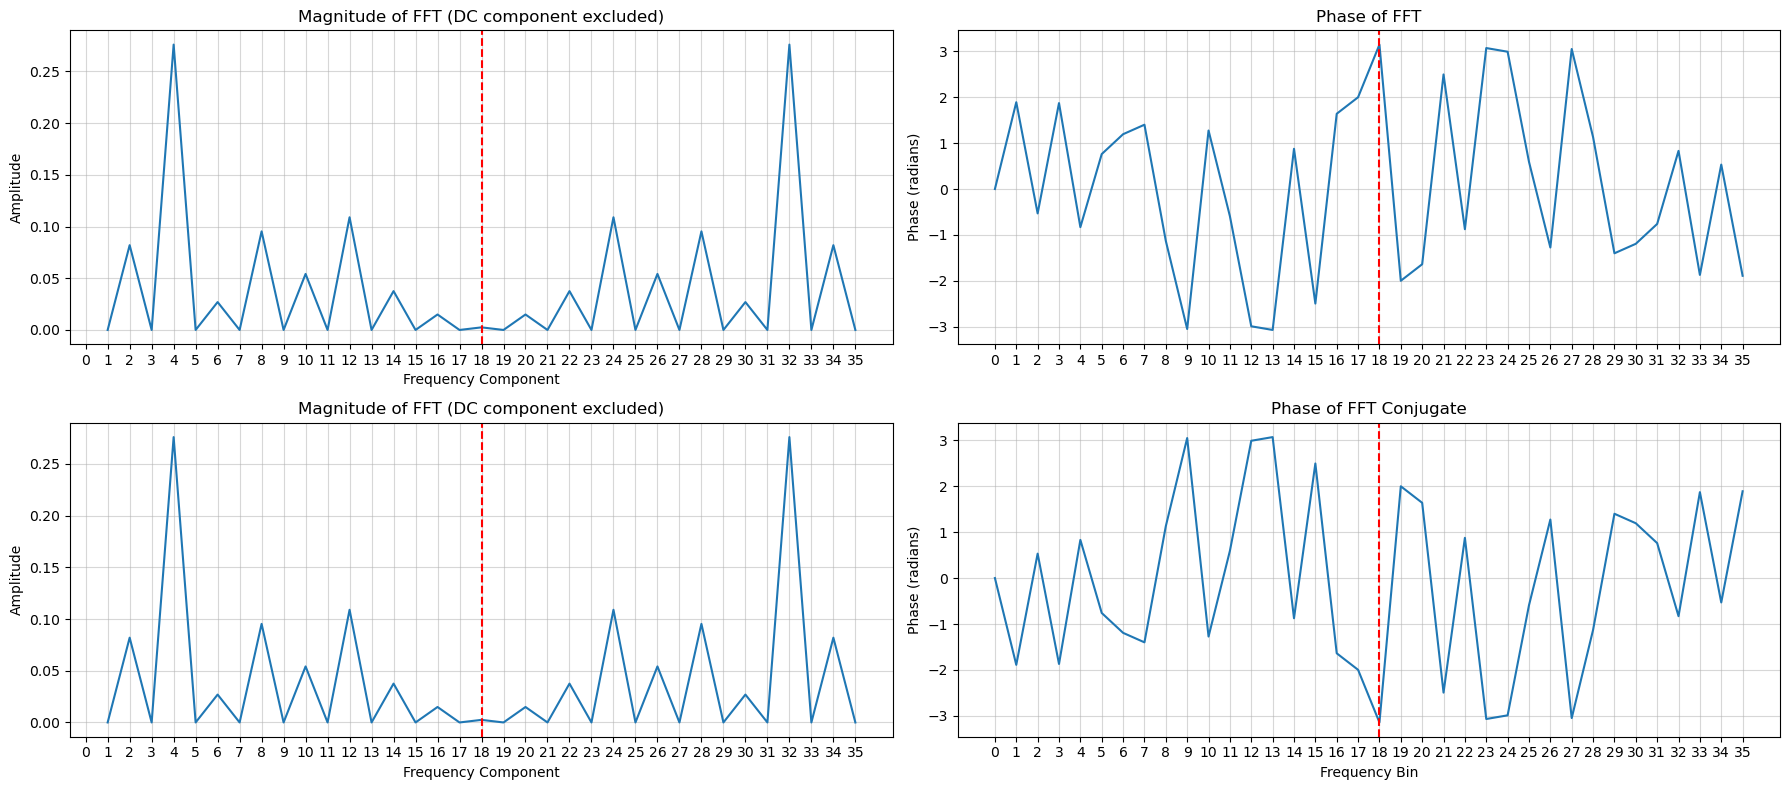

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

print("Calculating complex conjugate of fft_b")
fft_env_conj = np.conj(fft_env)
display(fft_env_conj)

magnitude = np.abs(fft_env)
magnitude_conj = np.abs(fft_env_conj)
# Plot without DC component (skip index 0)
axs[0, 0].plot(range(1, len(magnitude)), magnitude[1:])
axs[0, 0].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[0, 0].set_title('Magnitude of FFT (DC component excluded)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequency Component')
axs[0, 0].set_xticks(range(len(magnitude)))  # Show every tick
axs[0, 0].grid(True, alpha=0.5)  # Add grid background

# Plot phase before conjugation
axs[0, 1].plot(np.angle(fft_env))
axs[0, 1].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[0, 1].set_title('Phase of FFT')
axs[0, 1].set_ylabel('Phase (radians)')
axs[0, 1].set_xticks(range(len(np.angle(fft_env))))  # Show every tick
axs[0, 1].grid(True, alpha=0.5)  # Add grid background

# Plot magnitude after conjugation
axs[1, 0].plot(range(1, len(magnitude_conj)), magnitude_conj[1:])
axs[1, 0].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[1, 0].set_title('Magnitude of FFT (DC component excluded)')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlabel('Frequency Component')
axs[1, 0].set_xticks(range(len(magnitude_conj)))  # Show every tick
axs[1, 0].grid(True, alpha=0.5)  # Add grid background

# Plot phase after conjugation
axs[1, 1].plot(np.angle(fft_env_conj))
axs[1, 1].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[1, 1].set_title('Phase of FFT Conjugate')
axs[1, 1].set_ylabel('Phase (radians)')
axs[1, 1].set_xlabel('Frequency Bin')
axs[1, 1].set_xticks(range(len(np.angle(fft_env_conj))))  # Show every tick
axs[1, 1].grid(True, alpha=0.5)  # Add grid background

plt.tight_layout()
plt.show()

Calculating complex conjugate of fft_b


array([ 4.68195270e-06-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        8.13012555e-07+4.61082332e-06j,  0.00000000e+00-0.00000000e+00j,
       -4.39959641e-06+1.60132213e-06j,  0.00000000e+00-0.00000000e+00j,
       -2.34097635e-06-4.05468998e-06j,  0.00000000e+00-0.00000000e+00j,
        3.58658385e-06-3.00950119e-06j,  0.00000000e+00-0.00000000e+00j,
        3.58658385e-06+3.00950119e-06j,  0.00000000e+00-0.00000000e+00j,
       -2.34097635e-06+4.05468998e-06j,  0.00000000e+00-0.00000000e+00j,
       -4.39959641e-06-1.60132213e-06j,  0.00000000e+00-0.00000000e+00j,
        8.13012555e-07-4.61082332e-06j,  0.00000000e+00-0.00000000e+00j,
        4.68195270e-06-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        8.13012555e-07+4.61082332e-06j,  0.00000000e+00-0.00000000e+00j,
       -4.39959641e-06+1.60132213e-06j,  0.00000000e+00-0.00000000e+00j,
       -2.34097635e-06-4.05468998e-06j,  0.00000000e+00-0.00000000e+00j,
        3.58658385e-06-3.00950119e-06j,  0.00000000

array([ 0.       ,  0.       , -1.3962634,  0.       , -2.7925268,
        0.       ,  2.0943951,  0.       ,  0.6981317,  0.       ,
       -0.6981317,  0.       , -2.0943951,  0.       ,  2.7925268,
        0.       ,  1.3962634,  0.       ,  0.       ,  0.       ,
       -1.3962634,  0.       , -2.7925268,  0.       ,  2.0943951,
        0.       ,  0.6981317,  0.       , -0.6981317,  0.       ,
       -2.0943951,  0.       ,  2.7925268,  0.       ,  1.3962634,
        0.       ])

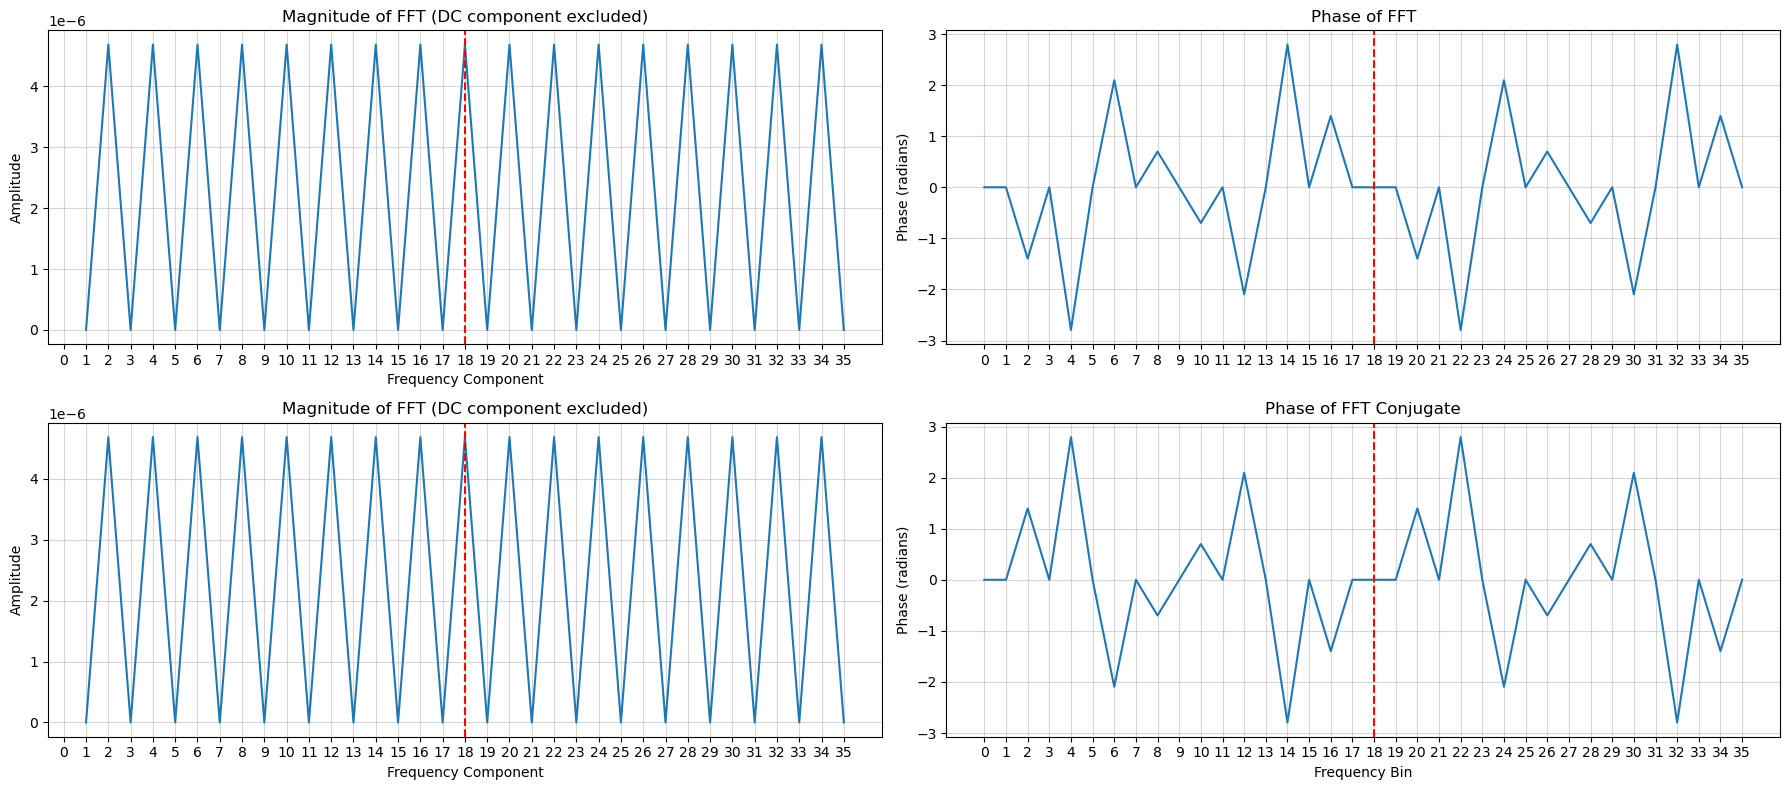

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

print("Calculating complex conjugate of fft_b")
fft_route_conj = np.conj(fft_route)
display(fft_route_conj)

magnitude = np.abs(fft_route)
display(np.angle(fft_route))
magnitude_conj = np.abs(fft_route_conj)
# Plot without DC component (skip index 0)
axs[0, 0].plot(range(1, len(magnitude)), magnitude[1:])
axs[0, 0].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[0, 0].set_title('Magnitude of FFT (DC component excluded)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlabel('Frequency Component')
axs[0, 0].set_xticks(range(len(magnitude)))  # Show every tick
axs[0, 0].grid(True, alpha=0.5)  # Add grid background

# Plot phase before conjugation
axs[0, 1].plot(np.angle(fft_route))
axs[0, 1].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[0, 1].set_title('Phase of FFT')
axs[0, 1].set_ylabel('Phase (radians)')
axs[0, 1].set_xticks(range(len(np.angle(fft_route))))  # Show every tick
axs[0, 1].grid(True, alpha=0.5)  # Add grid background

# Plot magnitude after conjugation
axs[1, 0].plot(range(1, len(magnitude_conj)), magnitude_conj[1:])
axs[1, 0].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[1, 0].set_title('Magnitude of FFT (DC component excluded)')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlabel('Frequency Component')
axs[1, 0].set_xticks(range(len(magnitude_conj)))  # Show every tick
axs[1, 0].grid(True, alpha=0.5)  # Add grid background

# Plot phase after conjugation
axs[1, 1].plot(np.angle(fft_route_conj))
axs[1, 1].axvline(x=18, color='red', linestyle='--', label='18 steps')
axs[1, 1].set_title('Phase of FFT Conjugate')
axs[1, 1].set_ylabel('Phase (radians)')
axs[1, 1].set_xlabel('Frequency Bin')
axs[1, 1].set_xticks(range(len(np.angle(fft_route_conj))))  # Show every tick
axs[1, 1].grid(True, alpha=0.5)  # Add grid background

plt.tight_layout()
plt.show()

Calculating the element-wise product of fft_a and the complex conjugate of fft_b
[ 4.68195270e-06+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  2.49033979e-07-2.92130705e-07j  0.00000000e+00-0.00000000e+00j
 -4.93447434e-07-1.19399065e-06j  0.00000000e+00+0.00000000e+00j
  7.82692686e-08+9.90645457e-08j  0.00000000e+00+0.00000000e+00j
 -1.13057294e-07+4.31771560e-07j -0.00000000e+00+0.00000000e+00j
 -9.88399089e-08-2.33607702e-07j  0.00000000e+00+0.00000000e+00j
  3.20237260e-07+3.97198403e-07j -0.00000000e+00+0.00000000e+00j
 -5.98073435e-08+1.65386167e-07j -0.00000000e+00+0.00000000e+00j
  6.79780416e-08-1.66814598e-08j  0.00000000e+00-0.00000000e+00j
 -1.17134639e-08-4.06094663e-23j -0.00000000e+00+0.00000000e+00j
  6.79780416e-08+1.66814598e-08j  0.00000000e+00-0.00000000e+00j
 -5.98073435e-08-1.65386167e-07j  0.00000000e+00-0.00000000e+00j
  3.20237260e-07-3.97198403e-07j  0.00000000e+00+0.00000000e+00j
 -9.88399089e-08+2.33607702e-07j  0.00000000e+00-0.00000000e+00j
 -1.13057

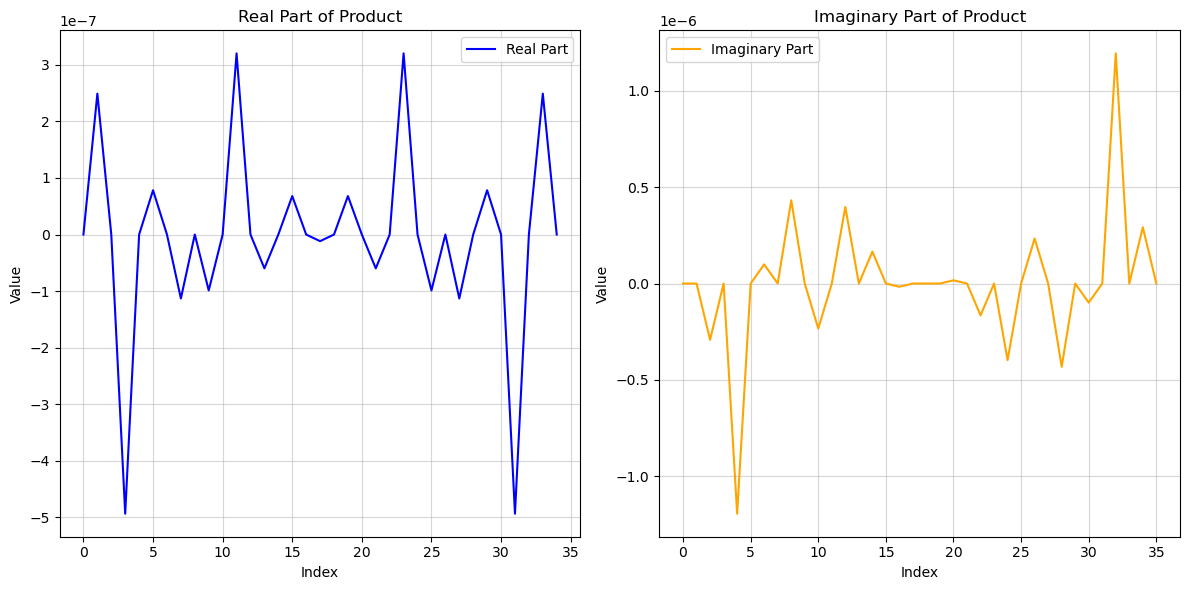

In [19]:
print("Calculating the element-wise product of fft_a and the complex conjugate of fft_b")
product = fft_route * fft_env_conj
print(product)

# Plotting the product
plt.figure(figsize=(12, 6))

# Plot 1: Real part of the product
plt.subplot(1, 2, 1)
plt.plot(np.real(product)[1:], color='blue', label='Real Part')
plt.title('Real Part of Product')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.5)
plt.legend()

# Plot 2: Imaginary part of the product
plt.subplot(1, 2, 2)
plt.plot(np.imag(product), color='orange', label='Imaginary Part')
plt.title('Imaginary Part of Product')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()



Calculating the inverse FFT of the product to get back to the time domain
[1.26971455e-07-1.12804073e-24j 1.22399677e-07-1.81304589e-24j
 2.23786488e-07-6.27494232e-24j 2.35172751e-07-4.75413251e-24j
 1.91899252e-07+9.16576245e-24j 1.58095695e-07-1.81304589e-24j
 8.01528870e-08-5.73668611e-24j 4.71518902e-08-1.61603044e-24j
 8.39577749e-08+4.75413251e-24j 1.08882648e-07+1.28923872e-23j
 6.90821348e-08-8.28374184e-24j 1.77871594e-07+6.81319853e-24j
 2.48480016e-07-2.40156860e-24j 1.29793894e-07+7.69269550e-24j
 9.12653785e-08-3.64870140e-24j 8.74114472e-08-3.42502580e-25j
 5.19644238e-08-1.13690538e-23j 1.06636946e-07-2.49552742e-24j
 1.26971455e-07+3.08657376e-24j 1.22399677e-07+2.79559949e-24j
 2.23786488e-07-6.61618308e-24j 2.35172751e-07-4.75413251e-24j
 1.91899252e-07+1.07277409e-23j 1.58095695e-07-2.69254286e-24j
 8.01528870e-08+1.45487133e-25j 4.71518902e-08-2.49552742e-24j
 8.39577749e-08+6.53952152e-24j 1.08882648e-07-3.42502580e-25j
 6.90821348e-08-1.18083086e-24j 1.77871594e-

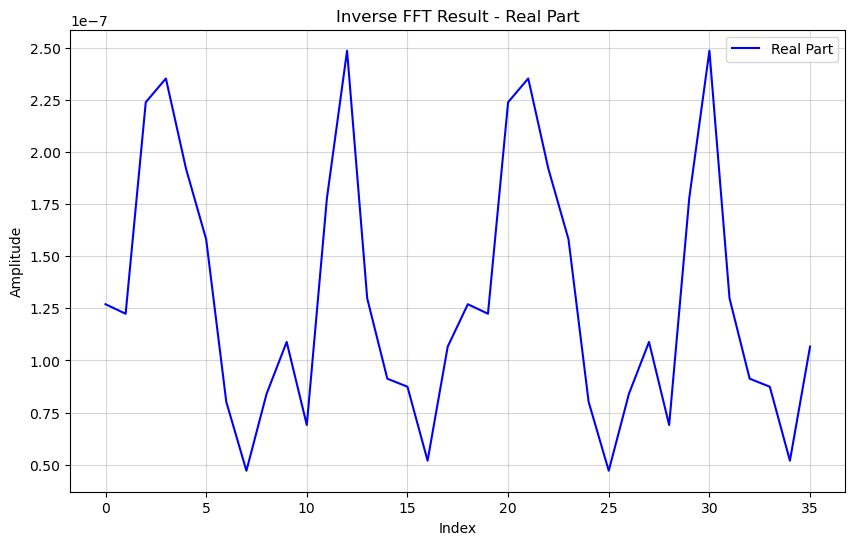

In [20]:
import matplotlib.pyplot as plt

print("Calculating the inverse FFT of the product to get back to the time domain")
result = np.fft.ifft(product)
print(result)

# Plotting the real part of the inverse FFT result
plt.figure(figsize=(10, 6))
plt.plot(result.real, label="Real Part", color='blue')
plt.title("Inverse FFT Result - Real Part")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

In [21]:
print("Rolling the result to center it around zero")
rolled_result = np.roll(result, -(len(env) // 2))
print(rolled_result)

Rolling the result to center it around zero
[1.26971455e-07+3.08657376e-24j 1.22399677e-07+2.79559949e-24j
 2.23786488e-07-6.61618308e-24j 2.35172751e-07-4.75413251e-24j
 1.91899252e-07+1.07277409e-23j 1.58095695e-07-2.69254286e-24j
 8.01528870e-08+1.45487133e-25j 4.71518902e-08-2.49552742e-24j
 8.39577749e-08+6.53952152e-24j 1.08882648e-07-3.42502580e-25j
 6.90821348e-08-1.18083086e-24j 1.77871594e-07+7.69269550e-24j
 2.48480016e-07+3.08657376e-24j 1.29793894e-07+2.79559949e-24j
 9.12653785e-08-1.52207162e-24j 8.74114472e-08-4.75413251e-24j
 5.19644238e-08-9.64870489e-24j 1.06636946e-07+7.49568006e-24j
 1.26971455e-07-1.12804073e-24j 1.22399677e-07-1.81304589e-24j
 2.23786488e-07-6.27494232e-24j 2.35172751e-07-4.75413251e-24j
 1.91899252e-07+9.16576245e-24j 1.58095695e-07-1.81304589e-24j
 8.01528870e-08-5.73668611e-24j 4.71518902e-08-1.61603044e-24j
 8.39577749e-08+4.75413251e-24j 1.08882648e-07+1.28923872e-23j
 6.90821348e-08-8.28374184e-24j 1.77871594e-07+6.81319853e-24j
 2.48480016